<a href="https://colab.research.google.com/github/Krykiet/TF_training/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Neural Networks in TF

Simplified: predicting a number based on other numbers

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating some data to view and fit

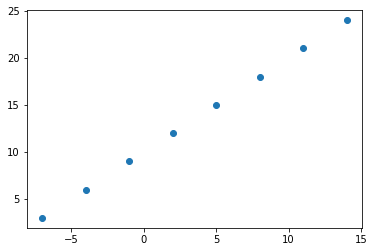

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

Shapes will vary depending on the problem

In [4]:
# Create a demo tensor for price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape= X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

These are scalars, rank 0 tensors - no shape

In [6]:
X[0].ndim

0

In [7]:
X_reshaped = X.reshape(-1, 1)
X_reshaped, X_reshaped.ndim

(array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]]), 2)

In [8]:
# Turn NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

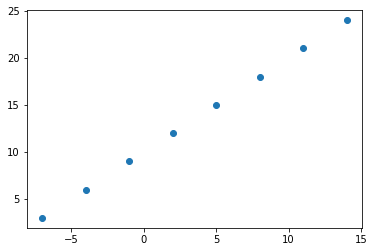

In [10]:
plt.scatter(X, y)

## Steps in modellling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a mode**l - define the loss function (how wrong the model is) and optimizer (tells model how to improve the patters its learning) and evaluation metrics(what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(1)
# ])

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error 
              optimizer=tf.keras.optimizers.SGD(), # SGD = stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 922ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/200
1/1 [==============================] - 0s 13ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/200
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/200
1/1 [==============================] - 0s 19ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/200
1/1 [==============================] - 0s 14ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/200
1/1 [==============================] - 0s 21ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/200
1/1 [==============================]

In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Make a prediction
y_pred = model.predict([17.0])

1/1 [==============================] - 0s 324ms/step


In [14]:
y_pred

array([[30.908516]], dtype=float32)

## Improving model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we can add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we can change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for morem **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [47]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.optimizers.SGD(),
              metrics=(["mae"]))

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=300, verbose=2)

Epoch 1/300
1/1 - 1s - loss: 16.1154 - mae: 16.1154 - 871ms/epoch - 871ms/step
Epoch 2/300
1/1 - 0s - loss: 14.9561 - mae: 14.9561 - 6ms/epoch - 6ms/step
Epoch 3/300
1/1 - 0s - loss: 14.5171 - mae: 14.5171 - 7ms/epoch - 7ms/step
Epoch 4/300
1/1 - 0s - loss: 14.1221 - mae: 14.1221 - 8ms/epoch - 8ms/step
Epoch 5/300
1/1 - 0s - loss: 13.7527 - mae: 13.7527 - 8ms/epoch - 8ms/step
Epoch 6/300
1/1 - 0s - loss: 13.3933 - mae: 13.3933 - 11ms/epoch - 11ms/step
Epoch 7/300
1/1 - 0s - loss: 13.0296 - mae: 13.0296 - 9ms/epoch - 9ms/step
Epoch 8/300
1/1 - 0s - loss: 12.6469 - mae: 12.6469 - 8ms/epoch - 8ms/step
Epoch 9/300
1/1 - 0s - loss: 12.2295 - mae: 12.2295 - 6ms/epoch - 6ms/step
Epoch 10/300
1/1 - 0s - loss: 11.7585 - mae: 11.7585 - 7ms/epoch - 7ms/step
Epoch 11/300
1/1 - 0s - loss: 11.2105 - mae: 11.2105 - 7ms/epoch - 7ms/step
Epoch 12/300
1/1 - 0s - loss: 10.5546 - mae: 10.5546 - 7ms/epoch - 7ms/step
Epoch 13/300
1/1 - 0s - loss: 9.7485 - mae: 9.7485 - 7ms/epoch - 7ms/step
Epoch 14/300
1/1 

In [17]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [38]:
X_expanded = tf.expand_dims(X, axis=1)
X_expanded2 = tf.expand_dims(X, axis=-1)
X_expanded == X_expanded2

<tf.Tensor: shape=(8, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [41]:
X, X_expanded, X_expanded2

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>)

In [40]:
X.shape, X_expanded.shape

(TensorShape([8]), TensorShape([8, 1]))

In [49]:
model.predict([1])

1/1 [==============================] - 0s 174ms/step


array([[11.8686]], dtype=float32)

In [50]:
model.predict([10])

1/1 [==============================] - 0s 83ms/step


array([[23.240662]], dtype=float32)

In [51]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_improved = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_improved.compile(loss="mae",
              optimizer=tf.optimizers.SGD(),
              metrics=(["mae"]))

# 3. Fit the model
model_improved.fit(tf.expand_dims(X, axis=-1), y, epochs=300, verbose=2)

Epoch 1/300
1/1 - 1s - loss: 13.2729 - mae: 13.2729 - 809ms/epoch - 809ms/step
Epoch 2/300
1/1 - 0s - loss: 13.0927 - mae: 13.0927 - 8ms/epoch - 8ms/step
Epoch 3/300
1/1 - 0s - loss: 12.9080 - mae: 12.9080 - 9ms/epoch - 9ms/step
Epoch 4/300
1/1 - 0s - loss: 12.7193 - mae: 12.7193 - 17ms/epoch - 17ms/step
Epoch 5/300
1/1 - 0s - loss: 12.5303 - mae: 12.5303 - 10ms/epoch - 10ms/step
Epoch 6/300
1/1 - 0s - loss: 12.3614 - mae: 12.3614 - 10ms/epoch - 10ms/step
Epoch 7/300
1/1 - 0s - loss: 12.2624 - mae: 12.2624 - 23ms/epoch - 23ms/step
Epoch 8/300
1/1 - 0s - loss: 12.1475 - mae: 12.1475 - 37ms/epoch - 37ms/step
Epoch 9/300
1/1 - 0s - loss: 12.0187 - mae: 12.0187 - 15ms/epoch - 15ms/step
Epoch 10/300
1/1 - 0s - loss: 11.8713 - mae: 11.8713 - 11ms/epoch - 11ms/step
Epoch 11/300
1/1 - 0s - loss: 11.6964 - mae: 11.6964 - 6ms/epoch - 6ms/step
Epoch 12/300
1/1 - 0s - loss: 11.4955 - mae: 11.4955 - 10ms/epoch - 10ms/step
Epoch 13/300
1/1 - 0s - loss: 11.2537 - mae: 11.2537 - 9ms/epoch - 9ms/step
E

In [55]:
# New model
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
# 2. Compile a model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 350ms/step - loss: 12.7339 - mae: 12.7339
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.2088 - mae: 12.2088
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.6861 - mae: 11.6861
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 11.1615 - mae: 11.1615
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.6118 - mae: 10.6118
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0388 - mae: 10.0388
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4399 - mae: 9.4399
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.8100 - mae: 8.8100
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1464 - mae: 8.1464
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.4413 - mae: 7.4413
Epoch 11/100
1/1 [==============================] - 0s 6ms/ste

In [ ]:
# Check data

In [56]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [58]:
# Make a prediction

argument = tf.constant([17.0])

model.predict(argument)

1/1 [==============================] - 0s 18ms/step


array([[31.85688]], dtype=float32)

In [75]:
# New model
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(60, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1)
])
# 2. Compile a model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 896ms/step - loss: 14.0062 - mae: 14.0062
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.7272 - mae: 12.7272
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7998 - mae: 11.7998
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8608 - mae: 10.8608
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 9.7115 - mae: 9.7115
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 8.2056 - mae: 8.2056
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 6.6027 - mae: 6.6027
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 4.6563 - mae: 4.6563
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 3.9930 - mae: 3.9930
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 5.1227 - mae: 5.1227
Epoch 11/100
1/1 [==============================] - 0s 11ms/step

In [73]:
arg = tf.constant([1.0])
model.predict(arg)

1/1 [==============================] - 0s 164ms/step


array([[11.604338]], dtype=float32)

In [79]:
# Optimal model
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 928ms/step - loss: 13.6633 - mae: 13.6633
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 12.7334 - mae: 12.7334
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 11.8063 - mae: 11.8063
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 10.8761 - mae: 10.8761
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 9.9353 - mae: 9.9353
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 8.9758 - mae: 8.9758
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 7.9888 - mae: 7.9888
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 6.9660 - mae: 6.9660
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 6.8090 - mae: 6.8090
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.2359 - mae: 7.2359
Epoch 11/100
1/1 [==============================] - 0s 11ms/

In [80]:
arg = tf.constant([17.0])
model.predict(arg)

1/1 [==============================] - 0s 84ms/step


array([[26.538244]], dtype=float32)

## Evalutaing a model